In [45]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../dane/wyniki/j._polski_podstawowa_2014.csv")

/usr/local/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
oceny = [col for col in df.columns if col.startswith("k_")]

In [5]:
df = df[oceny]

In [6]:
df.head()

,k_7475,k_7476,k_7477,k_7478,k_7479,k_7480,k_7481,k_7482,k_7483,k_7484,...,k_7490,k_7488,k_7493,k_7492,k_7503,k_7501,k_7502,k_7500,k_7505,k_7504
0,0,0,2,1,2,1,2,1,0,0,...,1,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,0,1,0,1,2,0,0,2,...,3,8,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,2,0,0,2,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,1,0,0,1,0,1,1,...,1,9,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.count()

k_7475    307656
k_7476    307656
k_7477    307656
k_7478    307656
k_7479    307656
k_7480    307656
k_7481    307656
k_7482    307656
k_7483    307656
k_7484    307656
k_7485    307656
k_7486    307656
k_7487    307656
k_7497    117108
k_7495    117108
k_7496    117108
k_7494    117108
k_7499    117108
k_7498    117108
k_7491    189177
k_7489    189177
k_7490    189177
k_7488    189177
k_7493    189177
k_7492    189177
k_7503      1371
k_7501      1371
k_7502      1371
k_7500      1371
k_7505      1371
k_7504      1371
dtype: int64

In [8]:
# pobiezny sposob
wariant = df[pd.notnull(df['k_7491'])]

In [10]:
wariant.count()

k_7475    189177
k_7476    189177
k_7477    189177
k_7478    189177
k_7479    189177
k_7480    189177
k_7481    189177
k_7482    189177
k_7483    189177
k_7484    189177
k_7485    189177
k_7486    189177
k_7487    189177
k_7497         0
k_7495         0
k_7496         0
k_7494         0
k_7499         0
k_7498         0
k_7491    189177
k_7489    189177
k_7490    189177
k_7488    189177
k_7493    189177
k_7492    189177
k_7503         0
k_7501         0
k_7502         0
k_7500         0
k_7505         0
k_7504         0
dtype: int64

In [11]:
wariant = wariant.dropna(axis=1)

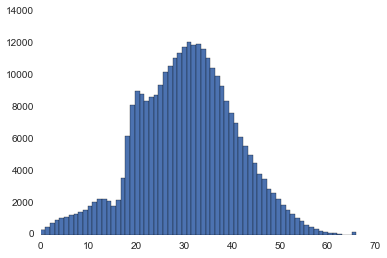

In [95]:
tmp = df.loc[:, "k_7480":"k_7504"].sum(axis=1)
tmp.hist(bins=(tmp.max() + 1))

In [13]:
df['suma'] = df.loc[:, "k_7475":"k_7487"].fillna(0).sum(axis=1)

In [15]:
df['sumb'] = df.loc[:, "k_7497":"k_7504"].fillna(0).sum(axis=1)

In [17]:
dwie = df[['suma', 'sumb']].copy()

In [20]:
dwie.max()

suma    20
sumb    54
dtype: float64

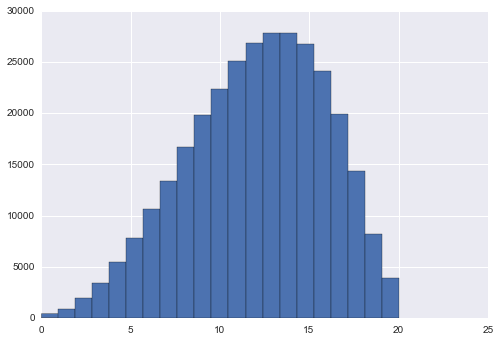

In [22]:
df['suma'].hist(bins=21)

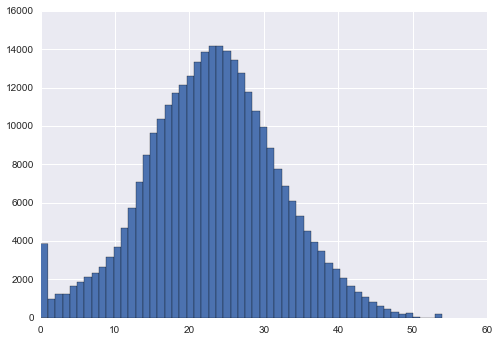

In [23]:
df['sumb'].hist(bins=55)

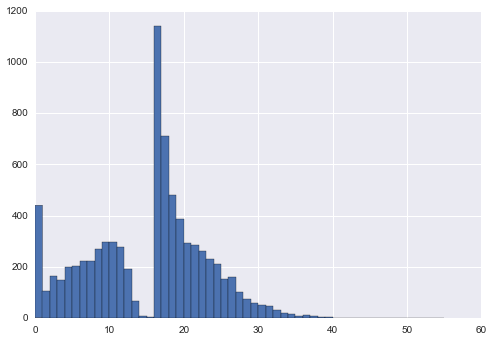

In [30]:
df.query("suma == 5")['sumb'].hist(bins=55, range=(0, 55))

In [34]:
h, b = np.histogram(df['suma'], bins=range(0, 20))

In [35]:
h

array([  398,   890,  1888,  3371,  5427,  7838, 10651, 13414, 16649,
       19824, 22329, 25096, 26837, 27869, 27854, 26807, 24162, 19913, 22537])

In [65]:
arr, xs, ys = np.histogram2d(df['suma'], df['sumb'], bins=(range(21), range(55)))

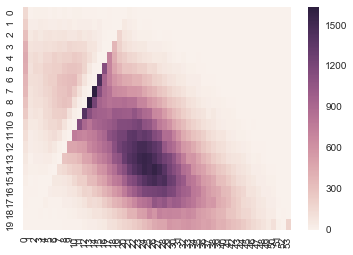

In [96]:
sns.heatmap(arr, linewidths=0)

In [67]:
len(arr[0])

54

In [68]:
len(ys)

55

In [64]:
ys

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.])

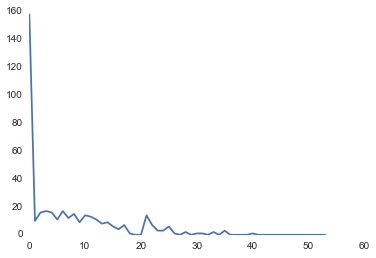

In [70]:
plt.plot(ys[:-1], arr[0])

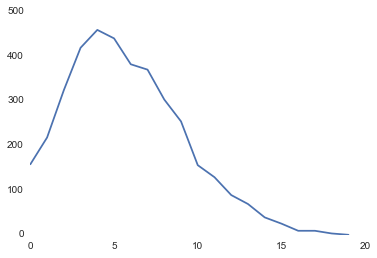

In [71]:
plt.plot(xs[:-1], arr[:,0])

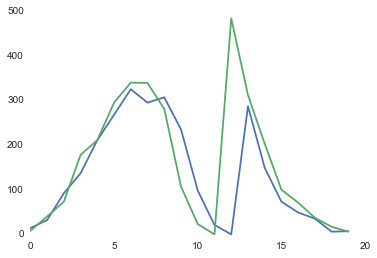

In [87]:
plt.plot(xs[:-1], arr[:,8])
plt.plot(xs[:-1], arr[:,9])

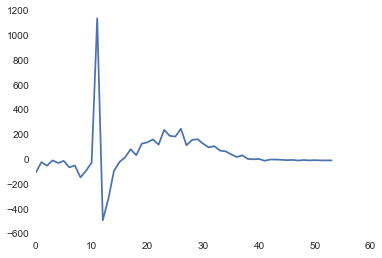

In [74]:
plt.plot(ys[:-1], arr[10] - arr[9])

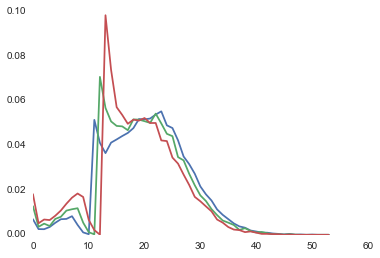

In [89]:
plt.plot(arr[10]/arr[10].sum())
plt.plot(arr[9]/arr[9].sum())
plt.plot(arr[8]/arr[8].sum())

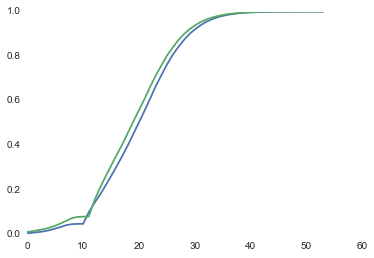

In [79]:
plt.plot(np.cumsum(arr[10])/arr[10].sum())
plt.plot(np.cumsum(arr[9])/arr[9].sum())

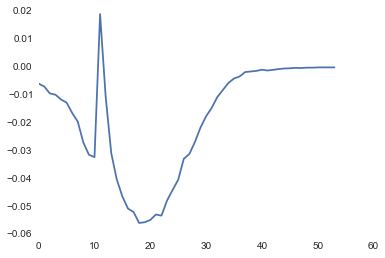

In [80]:
plt.plot(np.cumsum(arr[10])/arr[10].sum() - np.cumsum(arr[9])/arr[9].sum())

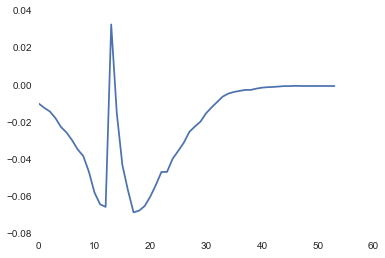

In [86]:
k = 7
plt.plot(np.cumsum(arr[k + 1])/arr[k + 1].sum() - np.cumsum(arr[k])/arr[k].sum())

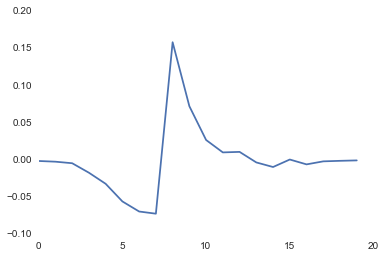

In [101]:
k = 12
plt.plot(np.cumsum(arr[:, k + 1])/arr[:, k + 1].sum() - np.cumsum(arr[:, k])/arr[:, k].sum())

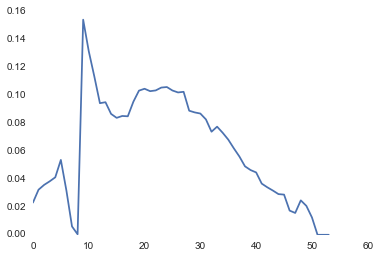

In [110]:
plt.plot((arr/arr.sum(axis=0))[12])